# 영화추천 시스템

1. Demographic Filtering(인구 통계학적 필터링)
2. Content Bassed Filtering(컨텐츠 기반 필터링)
3. Collaborative Filtering(협업 필터링)

# Demographic Filtering(인구 통계학적 필터링)

In [2]:
import pandas as pd
import numpy as np
df1=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")


In [3]:
df1.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [4]:
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [5]:
df1.shape,df2.shape

((4803, 4), (4803, 20))

In [6]:
df1['title'].equals(df2['title'])

True

In [7]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [8]:
df1.columns=['id', 'title', 'cast', 'crew']
# movie_id를 id로 맞추어 컬럼 변경

In [9]:
df1[['id', 'cast', 'crew']]
# 필요한 데이터만 가져오도록 변경

id                                               cast  \
0      19995  [{"cast_id": 242, "character": "Jake Sully", "...   
1        285  [{"cast_id": 4, "character": "Captain Jack Spa...   
2     206647  [{"cast_id": 1, "character": "James Bond", "cr...   
3      49026  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4      49529  [{"cast_id": 5, "character": "John Carter", "c...   
...      ...                                                ...   
4798    9367  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799   72766  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  231617  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  126186  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802   25975  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 3 columns]

In [10]:
df2=df2.merge(df1[['id', 'cast', 'crew']],on='id')
# id를 기준으로 합친다
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ...     revenue runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...  2787965087   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   961000000   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   880674609   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 22 columns]

영화 1: 영화의 평점이 10/10 -> 5명이 평가
영화 2: 영화의 평점이 8/10 ->500명 평가

In [11]:
C=df2['vote_average'].mean()
C

6.092171559442016

In [12]:
m=df2['vote_count'].quantile(0.9) # 상위 10퍼센트의 데이터를 가져온다
m

1838.4000000000015

In [13]:
q_movies=df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 22)

In [14]:
q_movies['vote_count'].sort_values()

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [15]:
def weigth_rating(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    return (v/(v+m)*R)+(m/(m+v)*C)
    

In [16]:
q_movies['score']=q_movies.apply(weigth_rating,axis=1)
q_movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew     score  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  7.050669  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  6.665696  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  6.239396  

[3 rows x 23 columns]

In [17]:
q_movies=q_movies.sort_values('score',ascending=False)
q_movies[["title","vote_count","vote_average","score"]].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

Text(0.5, 1.0, 'Popular Movies')

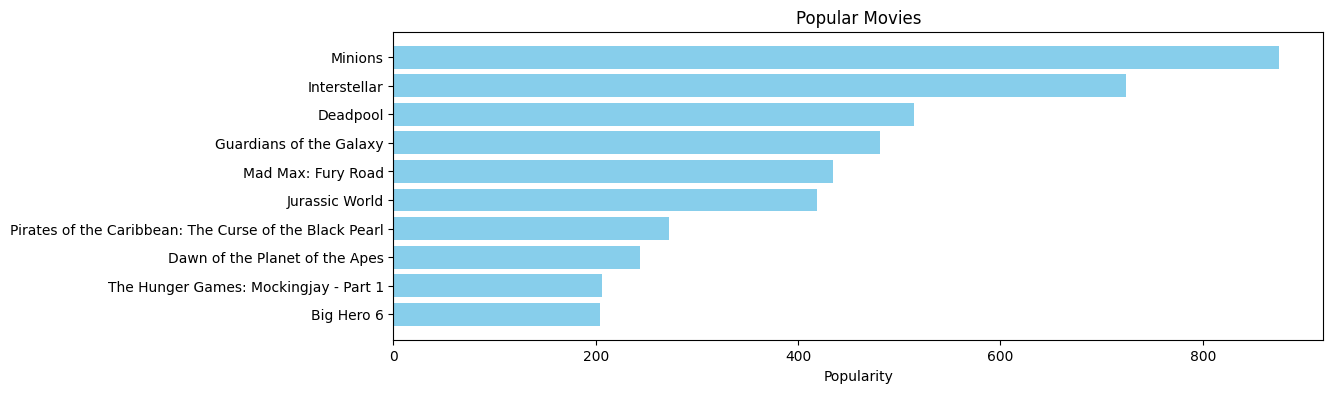

In [18]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# Content Bassed Filtering(컨텐츠 기반 필터링)

In [19]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 불필요한 단어 제외
tfidf=TfidfVectorizer(stop_words='english')

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [22]:
#  null 값이 하나라도 있으면 True를 반환
df2['overview'].isnull().values.any()

True

In [26]:
# fillna 빈값을 찾아 넣어준다
df2['overview']=df2['overview'].fillna('')

In [27]:
# 피쳐 백터화
tfidf_matrix=tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [29]:
# 정규화된 벡터를 만들었기 때문에 이를 이용하여 cosin유사도를 이용
from sklearn.metrics.pairwise import linear_kernel

cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim
# 자기자신을 제외한 가장 가까운 문장 이 1에 가깝게 나타난다

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [30]:
indicies=pd.Series(df2.index,index=df2['title']).drop_duplicates()
indicies

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [52]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화목록을 반환
def get_recommendations(title,cosine_sim=cosine_sim):
    #영화제목을 통해서 전체 데이터 기준 그 영화의 index값을 얻기
    idx=indicies[title] 
    # 코사인 유사도 매트릭스에서 인덱스에 해당하는 데이터를(idx,유사도) 형태로 얻기
    sim_scores=list(enumerate(cosine_sim[idx]))
    #코사인 유사도 기준으로 내림차순 정렬
    sim_scores=sorted(sim_scores,key=lambda x:x[1] ,reverse=True)
    #자기자신을 제외한 10개의 추천영화
    sim_scores[1:11]
    # 추천 영화 목록 10개의 인덱스 정보 추출
    movie_indices=[i[0] for i in sim_scores]
    # 인덱스 정보를 통해 연화 제목 축출
    return df2['title'].iloc[movie_indices]

In [33]:
test_idx=indicies['The Dark Knight Rises'] #영화제목을 통해서 전체 데이터 기준 그 영화의 index값을 얻기
test_idx

3

In [44]:
test_sim_scores=list(enumerate(cosine_sim[3])) # 코사인 유사도 매트릭스에서 인덱스에 해당하는 데이터를(idx,유사도) 형태로 얻기

In [46]:
test_sim_scores=sorted(test_sim_scores,key=lambda x:x[1] ,reverse=True)#코사인 유사도 기준으로 내림차순 정렬
test_sim_scores[1:11] #자기자신을 제외한 10개의 추천영화

[(65, 0.30151176591665485),
 (299, 0.29857045255396825),
 (428, 0.2878505467001694),
 (1359, 0.264460923827995),
 (3854, 0.18545003006561456),
 (119, 0.16799626199850706),
 (2507, 0.16682891043358278),
 (9, 0.1337400906655523),
 (1181, 0.13219702138476813),
 (210, 0.13045537014449818)]

In [47]:
def get_second(x):
    return x[1]
lst=['인덱스','유사도']
print(get_second(lst))

유사도


In [48]:
(lambda x:x[1])(lst)

'유사도'

In [50]:
# 추천 영화 목록 10개의 인덱스 정보 추출
test_movie_indices=[i[0] for i in test_sim_scores[1:11]]
test_movie_indices

[65, 299, 428, 1359, 3854, 119, 2507, 9, 1181, 210]

In [51]:
# 인덱스 정보를 통해 연화 제목 축출
df2['title'].iloc[test_movie_indices]

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [55]:
get_recommendations('The Avengers')

16                 The Avengers
7       Avengers: Age of Ultron
3144                    Plastic
1715                    Timecop
4124         This Thing of Ours
                 ...           
4795                       Bang
4798                El Mariachi
4799                  Newlyweds
4801           Shanghai Calling
4802          My Date with Drew
Name: title, Length: 4803, dtype: object

In [53]:
df2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies
